<br><br>

<p style="color:red; font-size:1.3em;">종종 Jupyter notebook에서 <b>Kernel Dead</b> 메시지가 뜨면서 강제로 kernel이 종료될 수 있습니다.</p><br>
<p style="font-size:1.3em;">이 현상은 이미지 파일 등을 처리할 때 컴퓨터의 메모리 부족 등의 이유로 발생할 수 있으며,<br><br>
만일 Kernel Dead 메시지가 뜨면 <span style="color:red;"> <b>다시 첫번째 Cell부터 실행하며 내려가다가 해당 Cell을 제외하고 실행</b>시켜주세요!</span></p>
    
<br><br>

<hr>
<br>

#### **Vision** - **torchvision**.datasets @ https://pytorch.org/vision/stable/datasets.html <br><br> :	CIFAR10 / FashionMNIST / Food101 / ImageNet / MS Coco Detection / etc.
<br>

<hr>
<br>

#### **Text** - **torchtext**.datasets @ https://pytorch.org/text/stable/datasets.html <br><br> :	IMDB / Amazon Reviews / Yelp Reviews / SQuAD / etc.
<br>

<hr>
<br>

#### **Audio** - **torchaudio**.datasets @ https://pytorch.org/audio/stable/datasets.html 
<br>

<hr>
<br>

#### **Recommendation-system** - **torchrec**.datasets @ https://pytorch.org/torchrec/torchrec.datasets.html
<br>

<hr>
<br>

#### **Data Pipelines** - **TorchData**(Beta) @ https://pytorch.org/data/beta/index.html
<br>

<hr>
<br>

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

import torch
from torch import nn

from torch.utils.data import DataLoader
from torchmetrics import Accuracy

import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

print(torch.__version__)
print(torchvision.__version__)

1.10.2
0.11.3


<br>
<br>

# 1. Prepare the dataset
<br>

### * Original Dataset : **Food-101** @ https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

<br>

- **101** food categories<br>
- **101,000** images<br>
- **750** training images & **250** test images per class<br>
- rescaled to have a **maximum side length of 512 pixels**

In [21]:
import zipfile
import os
import glob
import random

In [3]:
with zipfile.ZipFile("data_food101/Food101.zip", "r") as zip_f:
    
    print("Unzipping the dataset.") 
    
    zip_f.extractall("data_food101/data")

Unzipping the dataset.


In [7]:
for dir_path, dir_names, file_names in os.walk("data_food101/data"):
    
    if len(dir_names) == 3:
        print('--------------------------------')
    
    print("There are {} directories and {} images in '{}'.".format(len(dir_names), len(file_names), dir_path))

There are 2 directories and 0 images in 'data_food101/data'.
--------------------------------
There are 3 directories and 0 images in 'data_food101/data\test'.
There are 0 directories and 25 images in 'data_food101/data\test\pizza'.
There are 0 directories and 19 images in 'data_food101/data\test\steak'.
There are 0 directories and 31 images in 'data_food101/data\test\sushi'.
--------------------------------
There are 3 directories and 0 images in 'data_food101/data\train'.
There are 0 directories and 78 images in 'data_food101/data\train\pizza'.
There are 0 directories and 75 images in 'data_food101/data\train\steak'.
There are 0 directories and 72 images in 'data_food101/data\train\sushi'.


In [8]:
TRAIN_DIR = "data_food101/data/train"
TEST_DIR  = "data_food101/data/test"

In [19]:
# glob.glob("data_food101/data/train/*")

In [12]:
# glob.glob("data_food101/data/train/*/*.jpg")

In [26]:
train_images = glob.glob("data_food101/data/train/*/*.jpg")

sample_image = random.choice(train_images)

sample_image

'data_food101/data/train\\steak\\2629750.jpg'

512
512


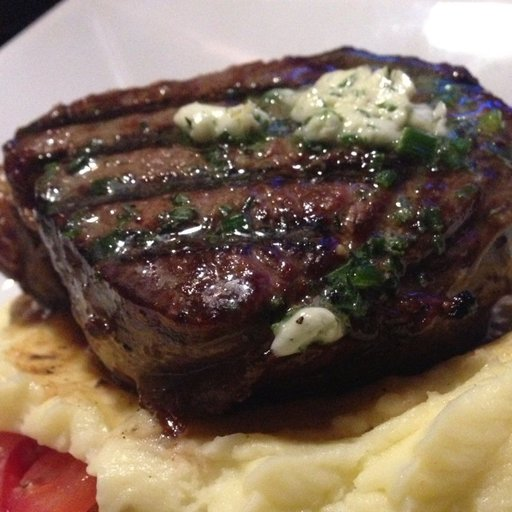

In [28]:
from PIL import Image

img = Image.open(sample_image)

print(img.height)
print(img.width)

img

(512, 512, 3)


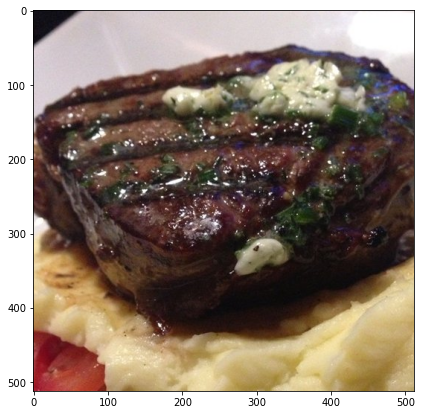

In [30]:
img = Image.open(sample_image)

# Should change an image file into a numpy array first to use "plt.imshow()"
img_array = np.array(img)

print(img_array.shape)

plt.figure(figsize=(10, 7))

plt.imshow(img_array)

<br>
<br>

# 2. Prepare the **DataLoader** - Using [ torchvision.datasets.**ImageFolder** ]

### 1) prepare the image-transformation (**Resize** & **ToTensor**)

In [ ]:
# from torchvision import transforms

In [87]:
# torchvision.transforms.ToTensor()는 pixel 값들을 [ 0~255 ] 에서 [ 0.0~1.0 ]으로 자동 변환합니다. @ https://bit.ly/3gpqIn0

IMG_TRANSFORM = transforms.Compose([
    
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor() # (Original) PIL format -> PyTorch tensors 

])

### 2) **image directories** -> **ImageFolder** (with image-transformation)

In [68]:
# from torchvision.datasets import ImageFolder

In [88]:
train_imgfolder = ImageFolder(root=TRAIN_DIR,
                              transform=IMG_TRANSFORM, # torchvision.transforms.Compose
                              target_transform=None)   # we can transform labels, too (if it is needed)

test_imgfolder  = ImageFolder(root=TEST_DIR,
                              transform=IMG_TRANSFORM)

print(train_imgfolder, '\n')
print(test_imgfolder)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data_food101/data/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           ) 

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data_food101/data/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [89]:
train_imgfolder.classes # automatically extracted from the names of directories

['pizza', 'steak', 'sushi']

In [90]:
len(train_imgfolder)

225

In [91]:
train_imgfolder[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [92]:
train_imgfolder.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [93]:
img   = train_imgfolder[0][0]
label = train_imgfolder[0][1]

<class 'torch.Tensor'>
torch.Size([3, 64, 64])
torch.float32
0


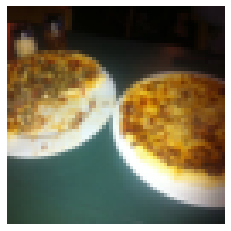

In [94]:
print(type(img))
print(img.shape) # after the data-augmentation
print(img.dtype)
print(label)

plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.show()

### 3) (**image directories** ->) **ImageFolder** -> **DataLoader** (iterable for mini-batches)

In [ ]:
# from torch.utils.data import DataLoader

In [95]:
os.cpu_count() # the total number of CPUs on the current machine

4

In [96]:
torch.manual_seed(42)

train_dataloader = DataLoader(dataset=train_imgfolder, 
                              batch_size=32, 
                              num_workers=os.cpu_count(), # number of subprocesses to use for data loading
                              shuffle=True)

test_dataloader  = DataLoader(dataset=test_imgfolder, 
                              batch_size=32, 
                              num_workers=os.cpu_count(), 
                              shuffle=False)

In [97]:
# A set of batch-data

batch_x, batch_y = next(iter(train_dataloader))

In [98]:
batch_x.shape

torch.Size([32, 3, 64, 64])

In [99]:
batch_y.shape

torch.Size([32])

<class 'torch.Tensor'>
torch.Size([3, 64, 64])
torch.float32


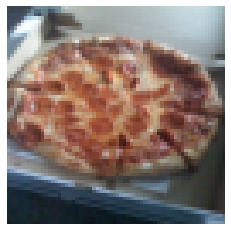

In [100]:
image_sample = batch_x[0]

print(type(image_sample))
print(image_sample.shape) # after the data-augmentation
print(image_sample.dtype)

plt.imshow(image_sample.permute(1, 2, 0))
plt.axis("off")
plt.show()

<br>
<br>

# 3. Build the model - CNN **without** data-augmentation

In [110]:
class CNN_TinyVGG(nn.Module):
    
    
    def __init__(self, num_channels, num_filters, num_classes): 
        
        super().__init__()
        
        
        self.conv_block_entrance = nn.Sequential(
            
            nn.Conv2d(in_channels=num_channels, # will be '3' == R/G/B
                      out_channels=num_filters, # num_filters == num of feature-maps == num of output channels
                      kernel_size=(3, 3), 
                      stride=1,     # default
                      padding=1),   # 0 == 'valid', 1 == 'same' 
            nn.ReLU(),
            
            nn.Conv2d(in_channels=num_filters,  # should be same as the number of "channels of previous output"
                      out_channels=num_filters,
                      kernel_size=(3, 3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2) # Default == kernel_size (자동으로 지정됨)
        )
        # [ 32, 3, 64, 64 ] -> [ 32, 10, 32, 32 ]
        
        
        self.conv_block_within = nn.Sequential(
            nn.Conv2d(num_filters, num_filters, (3, 3), padding=1),
            nn.ReLU(),
            nn.Conv2d(num_filters, num_filters, (3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        # [ 32, 10, 32, 32 ] -> [ 32, 10, 16, 16 ]
        
        
        self.classifier_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=num_filters * 16 * 16, 
                      out_features=num_classes)
        )
        # [ 32, 10, 16, 16 ] -> [ 32, 10 * 16 * 16 ] -> [ 32, 10 ]
    
    
    def forward(self, x):
        
        x = self.conv_block_entrance(x)
        # print(x.shape)
        
        x = self.conv_block_within(x)
        # print(x.shape)
        
        x = self.classifier_block(x)
        # print(x.shape)
        
        # 아래와 같이 코드를 작성하게되면 메모리가 크게 소요되는 변수 재할당 과정이 생략되므로 계산 속도가 향상됩니다. (https://bit.ly/3V16ZJy)
        # return self.classifier_block(conv_block_within(conv_block_entrance(x)))
        
        return x

<br>
<br>

# 4.  Train the model

In [106]:
device = "cuda" if torch.cuda.is_available() else "cpu" # "cuda"가 사용 가능하다면 (if it "is available")

device

<br>

### 1) Initialize the model

In [111]:
torch.manual_seed(42)

model = CNN_TinyVGG(num_channels=3, # R / G / B
                    num_filters=10, # number of filters == number of feature-maps
                    num_classes=3   # Pizza / Steak / Sushi
                   ).to(device)
    
model

CNN_TinyVGG(
  (conv_block_entrance): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_within): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [109]:
# # 모델 내에서의 Shape 변화를 확인하고 싶을 경우 forward 함수 내 주석 해제 후 아래 코드를 실행해주세요.

# temp_batch_x = next(iter(train_dataloader))[0]

# print(temp_batch_x.shape)

# model(temp_batch_x)

<br>

### 2) Check the model before training

In [123]:
# batch_x, batch_y = next(iter(train_dataloader))

sample_label = batch_y[0]

sample_img = batch_x[0]
print(sample_img.shape)

sample_img = sample_img.reshape(1, 3, 64, 64)
print(sample_img.shape, '\n')


model.eval()

with torch.inference_mode():
    logits = model(sample_img.to(device))

    
print(logits)

print(logits.softmax(dim=1)) # 행 방향

print(logits.softmax(dim=1).argmax(dim=1)[0]) # 행 방향

print(sample_label)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64]) 

tensor([[0.0578, 0.0634, 0.0351]])
tensor([[0.3352, 0.3371, 0.3277]])
tensor(1)
tensor(2)


In [ ]:
!pip install torchinfo # 1.7.1

In [125]:
from torchinfo import summary

summary(model, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
CNN_TinyVGG                              [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

<br>

### 3) Make train & test step as separate functions

In [147]:
def train_step(model, dataloader, loss_fn, optimizer, metric, device):
    
    # 모델을 training mode로 설정 (default state)
    model.train()
    
    # train-loss & train-accuracy for one epoch
    train_loss = 0
    train_acc  = 0
    
    for batch_idx, (X, y) in enumerate(dataloader): # X & y == a single batch
        
        X = X.to(device)
        y = y.to(device)
        
        # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        logits = model(X)

        # 2. (Batch) Training cost 계산 (Cost function 계산)
        loss = loss_fn(logits, y) # cost of batch <- nn.CrossEntropyLoss() : built-in Softmax
        train_loss += loss.item()
        
        # 3. Optimizer 내부의 이전 gradient 값 초기화 (Make "grad" to "zero")
        optimizer.zero_grad()

        # 4. Back-propagation ("Backward" propagation)
        loss.backward()

        # 5. Gradient descent 진행 (Take a "step" to update parameters)
        optimizer.step()

        # 6. (Batch) Training accuracy 계산 
        predicted_classes = logits.softmax(dim=1).argmax(dim=1)
        train_acc += metric(predicted_classes, y).item() # calculate the batch accuracy & add to the epoch accuracy

    
    # Batch 순회 종료 후
    train_loss = train_loss / len(dataloader) # cost of batches / num of batches (calculate average)
    train_acc  = train_acc  / len(dataloader) # acc  of batches / num of batches (calculate average)
    
    return train_loss, train_acc

In [146]:
def test_step(model, dataloader, loss_fn, metric, device):
    
    # 모델을 evaluation mode로 설정
    model.eval() 
    
    # test-loss & test-accuracy for one epoch
    test_loss = 0
    test_acc  = 0
    
    with torch.inference_mode(): # Set "inference mode"
        
        for batch_idx, (X, y) in enumerate(dataloader): # X & y == a single batch
            
            X = X.to(device)
            y = y.to(device)
    
            # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
            logits = model(X)

            # 2. (Batch) Test cost 계산 (Cost function 계산)
            loss = loss_fn(logits, y) # cost of batch <- nn.CrossEntropyLoss() : built-in Softmax
            test_loss += loss.item()

            # 3. (Batch) Test accuracy 계산 
            predicted_classes = logits.softmax(dim=1).argmax(dim=1)
            test_acc += metric(predicted_classes, y).item() # calculate the batch accuracy & add to the epoch accuracy

    
    # Batch 순회 종료 후
    test_loss = test_loss / len(dataloader) # cost of batches / num of batches (calculate average)
    test_acc  = test_acc  / len(dataloader) # acc  of batches / num of batches (calculate average)
    
    return test_loss, test_acc

<br>

### 4) Combine train & test step into a simplified "train" function 

In [148]:
def train(model, 
          train_dataloader, test_dataloader, 
          optimizer, loss_fn, metric, 
          device, epochs=5):
    
    
    results = {"train_loss": [], 
               "train_acc" : [], 
               "test_loss" : [], 
               "test_acc"  : []}
    
    
    for epoch in tqdm(range(epochs)): # from tqdm.auto import tqdm
        
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn, 
                                           optimizer=optimizer, 
                                           metric=metric, 
                                           device=device)
        
        test_loss, test_acc   = test_step(model=model,
                                          dataloader=test_dataloader, 
                                          loss_fn=loss_fn, 
                                          metric=metric, 
                                          device=device)
        
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
        
        print('Epoch : {} | Train_loss : {} | Train_acc : {} | Test_loss : {} | Test_acc : {}'.format(epoch+1, 
                                                                                                      train_loss, 
                                                                                                      train_acc, 
                                                                                                      test_loss, 
                                                                                                      test_acc))
    
    return results

<br>

### 5) Train the model & Check the result

In [160]:
torch.manual_seed(42) 

model = CNN_TinyVGG(num_channels=3, # R / G / B
                    num_filters=10, # number of filters == number of feature-maps
                    num_classes=3   # Pizza / Steak / Sushi <- len(train_data.classes)
                   ).to(device)

In [161]:
loss_fn = nn.CrossEntropyLoss() # Softmax + CrossEntropy (built-in Softmax)

optimizer = torch.optim.Adam(params=model.parameters(), # "parameters" to optimize (apply gradient descent)
                             lr=0.001)                  # "l"earning "r"ate 
    
metric_accuracy = Accuracy().to(device) # from torchmetrics import Accuracy

In [162]:
from timeit import default_timer as timer 

START_TIME = timer()

NUM_EPOCHS = 10

model_results = train(model=model, 
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn, 
                      metric=metric_accuracy,
                      device=device,
                      epochs=NUM_EPOCHS)

END_TIME = timer()

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 1 | Train_loss : 1.1078356504440308 | Train_acc : 0.2578125 | Test_loss : 1.1362075010935466 | Test_acc : 0.2604166666666667
Epoch : 2 | Train_loss : 1.084644876420498 | Train_acc : 0.42578125 | Test_loss : 1.1621671517690022 | Test_acc : 0.19791666666666666
Epoch : 3 | Train_loss : 1.1152725219726562 | Train_acc : 0.29296875 | Test_loss : 1.1694695154825847 | Test_acc : 0.19791666666666666
Epoch : 4 | Train_loss : 1.0989955812692642 | Train_acc : 0.2890625 | Test_loss : 1.134177525838216 | Test_acc : 0.19791666666666666
Epoch : 5 | Train_loss : 1.098921298980713 | Train_acc : 0.29296875 | Test_loss : 1.1433651447296143 | Test_acc : 0.19791666666666666
Epoch : 6 | Train_loss : 1.096383586525917 | Train_acc : 0.30859375 | Test_loss : 1.1485037803649902 | Test_acc : 0.2604166666666667
Epoch : 7 | Train_loss : 1.1183543056249619 | Train_acc : 0.31640625 | Test_loss : 1.1414344310760498 | Test_acc : 0.3333333333333333
Epoch : 8 | Train_loss : 1.1010172367095947 | Train_acc : 0.3632

In [163]:
print('Training time : {} seconds'.format(round(END_TIME-START_TIME, 2)))

Training time : 106.05 seconds


In [164]:
model_results

{'train_loss': [1.1078356504440308,
  1.084644876420498,
  1.1152725219726562,
  1.0989955812692642,
  1.098921298980713,
  1.096383586525917,
  1.1183543056249619,
  1.1010172367095947,
  1.0883031785488129,
  1.0668021216988564],
 'train_acc': [0.2578125,
  0.42578125,
  0.29296875,
  0.2890625,
  0.29296875,
  0.30859375,
  0.31640625,
  0.36328125,
  0.48828125,
  0.40234375],
 'test_loss': [1.1362075010935466,
  1.1621671517690022,
  1.1694695154825847,
  1.134177525838216,
  1.1433651447296143,
  1.1485037803649902,
  1.1414344310760498,
  1.1040594975153606,
  1.0661935806274414,
  1.0149725675582886],
 'test_acc': [0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.3333333333333333,
  0.20833333333333334,
  0.5416666666666666,
  0.5416666666666666]}

In [165]:
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [166]:
train_loss = model_results['train_loss']
test_loss  = model_results['test_loss']

train_acc  = model_results['train_acc']
test_acc   = model_results['test_acc']

epochs = range(len(model_results['train_loss']))

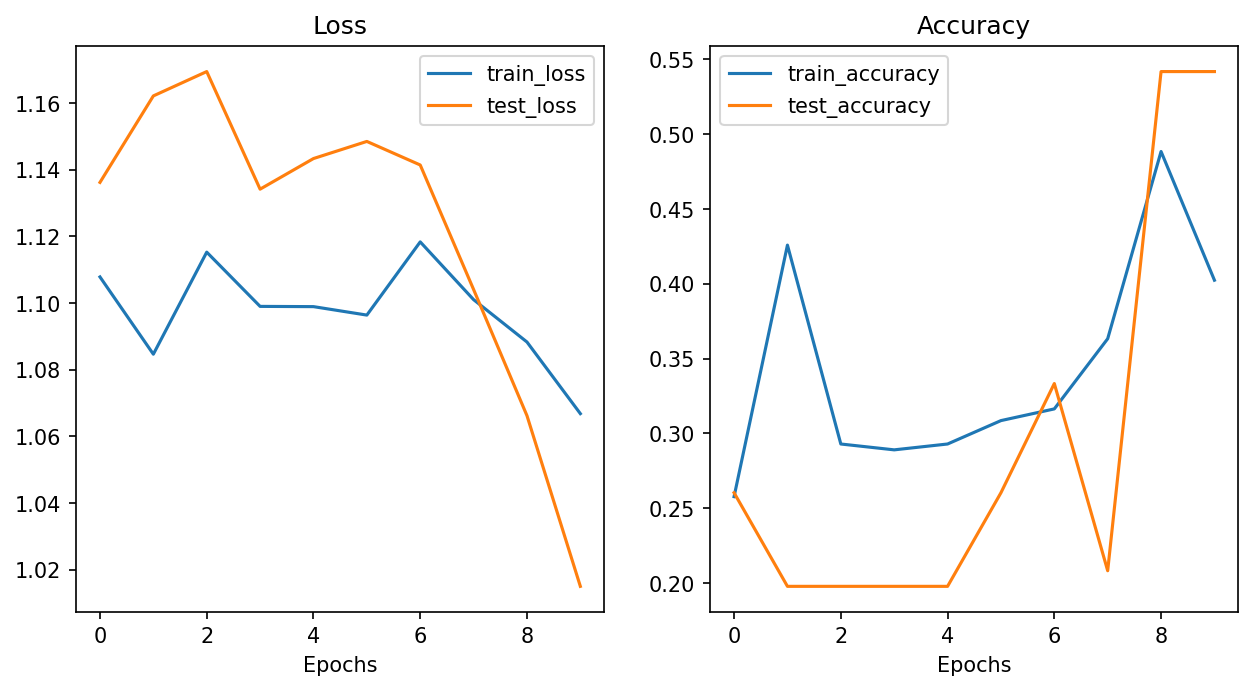

In [167]:
plt.figure(figsize=(10, 5), dpi=150)

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='train_loss')
plt.plot(epochs, test_loss,  label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='train_accuracy')
plt.plot(epochs, test_acc,  label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

<br>

### -> Test data 기준 정확도가 겨우 20%? (**Under-fitting**)

<br>

In [168]:
import pickle

with open('model_result_CNN_1.pkl', 'wb') as f:
    pickle.dump(model_results, f)